In [1]:
import os
import glob
import warnings
import traceback

from multiprocessing import Pool

import tqdm
import pyart
import netCDF4
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

warnings.simplefilter('ignore')

In [2]:
cluttermask = "../saved_mask/CLUTTER_map_CPOL_20061210.nc"
with netCDF4.Dataset(cluttermask, "r") as ncid:
    CLUTTER_RANGE = ncid['range'][:]
    CLUTTER_AZIMUTH = ncid['azimuth'][:]

In [3]:
infile = '/g/data2/rr5/CPOL_radar/CPOL_level_1b/PPI/2013/20130203/cfrad.20130203_002002.000_to_20130203_002838.000_CPOL_PPI_level1b.nc'

In [5]:
def make_filter(radar):
    sl = radar.get_slice(0)
    r = radar.range['data']
    azi = radar.azimuth['data'][sl]
    fil = np.zeros_like(radar.fields['total_power']['data']).filled(0)

    for cr, ca in zip(CLUTTER_RANGE, CLUTTER_AZIMUTH):
        nposr = np.argmin(np.abs(r - cr))
        nposa = np.argmin(np.abs(azi - ca))
        fil[nposa, nposr] = 1
        
    return fil

In [6]:
radar = pyart.io.read(infile)
gr = pyart.graph.RadarDisplay(radar)
gf = pyart.filters.GateFilter(radar)
fil = make_filter(radar)
radar.add_field_like('total_power', 'CMAP', fil, replace_existing=True)
gf.exclude_equal('CMAP', 0)

# 2013 using clutter mask from 2006.

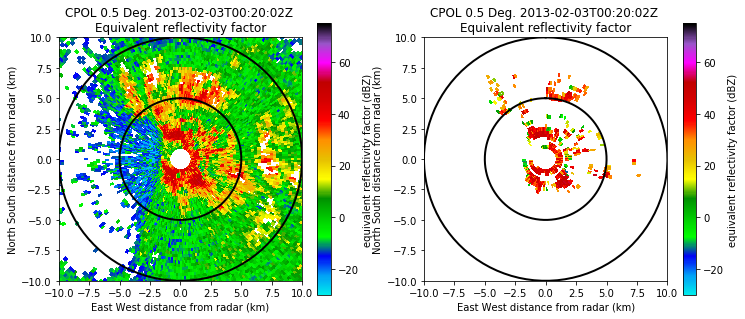

In [7]:
fig, ax = pl.subplots(1, 2, figsize=(12, 5))
gr.plot_ppi('total_power', ax=ax[0])
gr.plot_ppi('total_power', gatefilter=gf, ax=ax[1])

for myax in ax:
    myax.set_xlim(-10, 10)
    myax.set_ylim(-10, 10)
    myax.set_aspect(1)
    gr.plot_range_rings([5, 10], ax=myax)
pl.show()

In [8]:
infile = '/g/data2/rr5/CPOL_radar/CPOL_level_1b/PPI/2006/20060101/cfrad.20060101_000000.000_to_20060101_000816.000_CPOL_PPI_level1b.nc'

In [12]:
radar = pyart.io.read(infile)
gr = pyart.graph.RadarDisplay(radar)
gf = pyart.filters.GateFilter(radar)
fil = make_filter(radar)
radar.add_field_like('total_power', 'CMAP', fil, replace_existing=True)
gf.exclude_equal('CMAP', 0)

# 2006 using clutter mask from 2006.

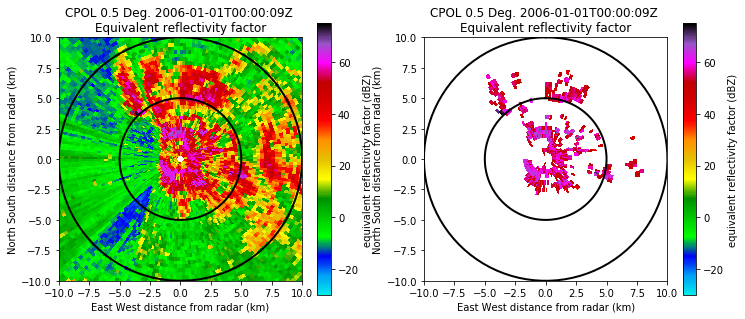

In [13]:
fig, ax = pl.subplots(1, 2, figsize=(12, 5))
gr.plot_ppi('total_power', ax=ax[0])
gr.plot_ppi('total_power', gatefilter=gf, ax=ax[1])

for myax in ax:
    myax.set_xlim(-10, 10)
    myax.set_ylim(-10, 10)
    myax.set_aspect(1)
    gr.plot_range_rings([5, 10], ax=myax)
pl.show()

In [16]:
infile = '/g/data2/rr5/CPOL_radar/CPOL_level_1b/PPI/2001/20011106/cfrad.20011106_000000.000_to_20011106_000817.000_CPOL_PPI_level1b.nc'

In [17]:
radar = pyart.io.read(infile)
gr = pyart.graph.RadarDisplay(radar)
gf = pyart.filters.GateFilter(radar)
fil = make_filter(radar)
radar.add_field_like('total_power', 'CMAP', fil, replace_existing=True)
gf.exclude_equal('CMAP', 0)

# 2001 using clutter mask from 2006.

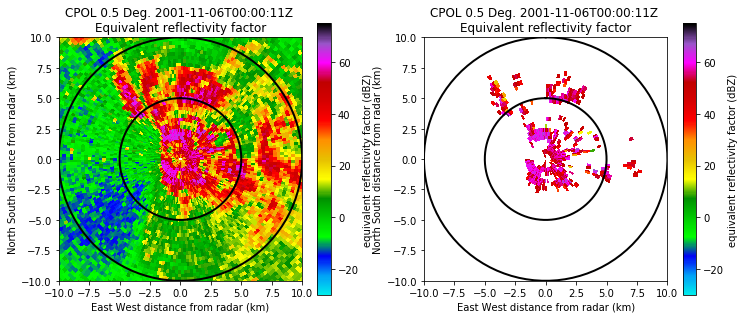

In [18]:
fig, ax = pl.subplots(1, 2, figsize=(12, 5))
gr.plot_ppi('total_power', ax=ax[0])
gr.plot_ppi('total_power', gatefilter=gf, ax=ax[1])

for myax in ax:
    myax.set_xlim(-10, 10)
    myax.set_ylim(-10, 10)
    myax.set_aspect(1)
    gr.plot_range_rings([5, 10], ax=myax)
pl.show()

In [19]:
cluttermask = "../saved_mask/CLUTTER_map_CPOL_20150101.nc"
with netCDF4.Dataset(cluttermask, "r") as ncid:
    CLUTTER_RANGE = ncid['range'][:]
    CLUTTER_AZIMUTH = ncid['azimuth'][:]

In [20]:
infile = '/g/data2/rr5/CPOL_radar/CPOL_level_1b/PPI/2013/20130203/cfrad.20130203_002002.000_to_20130203_002838.000_CPOL_PPI_level1b.nc'

In [21]:
radar = pyart.io.read(infile)
gr = pyart.graph.RadarDisplay(radar)
gf = pyart.filters.GateFilter(radar)
fil = make_filter(radar)
radar.add_field_like('total_power', 'CMAP', fil, replace_existing=True)
gf.exclude_equal('CMAP', 0)

# 2013 using clutter mask from 2013. 

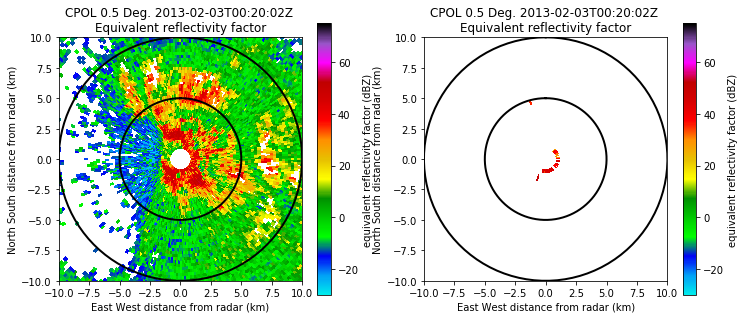

In [23]:
fig, ax = pl.subplots(1, 2, figsize=(12, 5))
gr.plot_ppi('total_power', ax=ax[0])
gr.plot_ppi('total_power', gatefilter=gf, ax=ax[1])

for myax in ax:
    myax.set_xlim(-10, 10)
    myax.set_ylim(-10, 10)
    myax.set_aspect(1)
    gr.plot_range_rings([5, 10], ax=myax)
pl.show()